In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# read in CouncilDistricts.csv
districts = pd.read_csv(r'D:\Users\User\Downloads\RA Work\acs\Bay_Area_Census_Tracts_-_Cartographic__2010-2019__20240405.csv')

# # only get columns the_geom, district
districts = districts[['the_geom', 'TRACT']]

# # # # rename the_geom to geometry and DISTRICT to district
districts = districts.rename(columns={'the_geom': 'geometry', 'TRACT': 'TRACTCE'})

# # convert geometry to geopandas geometry
# districts['geometry'] = districts['geometry'].apply(wkt.loads)

# # convert districts to geopandas dataframe
# districts = gpd.GeoDataFrame(districts, geometry = 'geometry')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\User\\Downloads\\RA Work\\acs\\Bay_Area_Census_Tracts_-_Cartographic__2010-2019__20240405.csv'

In [30]:
# download districts as csv
districts.to_csv(r'D:\Users\User\Downloads\RA Work\acs\tracts\berkeley_tracts_2010.csv', index=False)

In [25]:
districts

,geometry,TRACTCE
0,MULTIPOLYGON (((-121.913612999747 37.301543000...,502301
1,MULTIPOLYGON (((-121.884290000003 37.435610000...,504418
2,MULTIPOLYGON (((-122.049639999979 37.315550000...,507807
3,MULTIPOLYGON (((-122.439679000253 37.636303000...,604102
4,MULTIPOLYGON (((-121.972767999945 37.542258000...,441921
...,...,...
1577,MULTIPOLYGON (((-122.322657999643 37.931100999...,386000
1578,MULTIPOLYGON (((-121.790609000156 37.229824000...,512032
1579,MULTIPOLYGON (((-122.4472389998 37.62433999978...,603802
1580,MULTIPOLYGON (((-122.427344000423 37.610042000...,603900


In [15]:
# import Census_Tract_Boundaries.shp
blocks = gpd.read_file(r'rawdata/tl_2010_06_tract00/tl_2010_06_tract00.shp')

In [16]:
blocks

,STATEFP00,COUNTYFP00,TRACTCE00,CTIDFP00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry
0,06,059,062629,06059062629,626.29,Census Tract 626.29,G5020,S,1070704,0,+33.6347820,-117.8209398,"POLYGON ((-117.81478 33.63045, -117.81591 33.6..."
1,06,059,062630,06059062630,626.30,Census Tract 626.30,G5020,S,4549889,54671,+33.6520157,-117.7890788,"POLYGON ((-117.80151 33.65848, -117.80144 33.6..."
2,06,059,062631,06059062631,626.31,Census Tract 626.31,G5020,S,2378583,0,+33.6401283,-117.8123266,"POLYGON ((-117.81841 33.64936, -117.81831 33.6..."
3,06,059,062632,06059062632,626.32,Census Tract 626.32,G5020,S,14281153,4493219,+33.5465608,-117.7512423,"POLYGON ((-117.77414 33.55685, -117.77403 33.5..."
4,06,059,062633,06059062633,626.33,Census Tract 626.33,G5020,S,6778732,0,+33.5635810,-117.7391584,"POLYGON ((-117.72003 33.55004, -117.72022 33.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,06,037,237720,06037237720,2377.20,Census Tract 2377.20,G5020,S,397795,0,+33.9692959,-118.2849386,"POLYGON ((-118.28072 33.96787, -118.28093 33.9..."
7045,06,037,237800,06037237800,2378,Census Tract 2378,G5020,S,972785,0,+33.9709601,-118.2981214,"POLYGON ((-118.29927 33.96728, -118.30024 33.9..."
7046,06,037,237710,06037237710,2377.10,Census Tract 2377.10,G5020,S,528213,0,+33.9727027,-118.2849322,"POLYGON ((-118.28092 33.97079, -118.28132 33.9..."
7047,06,037,237900,06037237900,2379,Census Tract 2379,G5020,S,979778,0,+33.9709293,-118.3111925,"POLYGON ((-118.31556 33.96728, -118.31773 33.9..."


In [18]:
# only take TRACTCE and geometry
blocks = blocks[['TRACTCE00', 'geometry']]

# # rename TRACTCE10 to TRACTCE
blocks = blocks.rename(columns={'TRACTCE00': 'TRACTCE'})

In [19]:
# only keep chars after space in district
blocks['district'] = blocks['district'].str.split(' ').str[2]

KeyError: 'district'

In [20]:
blocks

,TRACTCE,geometry
0,062629,"POLYGON ((-117.81478 33.63045, -117.81591 33.6..."
1,062630,"POLYGON ((-117.80151 33.65848, -117.80144 33.6..."
2,062631,"POLYGON ((-117.81841 33.64936, -117.81831 33.6..."
3,062632,"POLYGON ((-117.77414 33.55685, -117.77403 33.5..."
4,062633,"POLYGON ((-117.72003 33.55004, -117.72022 33.5..."
...,...,...
7044,237720,"POLYGON ((-118.28072 33.96787, -118.28093 33.9..."
7045,237800,"POLYGON ((-118.29927 33.96728, -118.30024 33.9..."
7046,237710,"POLYGON ((-118.28092 33.97079, -118.28132 33.9..."
7047,237900,"POLYGON ((-118.31556 33.96728, -118.31773 33.9..."


In [14]:
# download as berkeley_council_2002.csv
blocks.to_csv(r'D:\Users\User\Downloads\RA Work\acs\geodata\oakland_city_council_2003.csv', index = False)

In [56]:


# only keep blocks that overlap with at least one district
blocks = gpd.sjoin(blocks, districts, how='inner', op='intersects')

# only keep DIST_NAME and geometry
blocks = blocks[['DIST_NAME', 'geometry']]

# rename DIST_Name to CE2020
blocks = blocks.rename(columns={'DIST_NAME': 'CE2020'})

# reformat CE2020 to be everything after that comes after the string "CENSUS TRACT #"
blocks['CE2020'] = blocks['CE2020'].str.split('CENSUS TRACT #').str[1]

# remove duplicate CE 2020s
blocks = blocks.drop_duplicates(subset='CE2020')

blocks

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\User\AppData\Local\Temp\ipykernel_28588\439761138.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  blocks = gpd.sjoin(blocks, districts, how='inner', op='intersects')


,CE2020,geometry
0,4001,"POLYGON ((-122.24466 37.88364, -122.24256 37.8..."
1,4002,"POLYGON ((-122.24478 37.85173, -122.24471 37.8..."
3,4004,"POLYGON ((-122.25313 37.85154, -122.25307 37.8..."
4,4005,"POLYGON ((-122.26017 37.85262, -122.26025 37.8..."
6,4007,"POLYGON ((-122.27595 37.84660, -122.27591 37.8..."
7,4008,"POLYGON ((-122.28356 37.85062, -122.28355 37.8..."
87,4201,"POLYGON ((-122.29435 37.89863, -122.29389 37.8..."
89,4205,"POLYGON ((-122.29107 37.88397, -122.29077 37.8..."
90,4206,"POLYGON ((-122.28220 37.88660, -122.28231 37.8..."
91,4211,"POLYGON ((-122.26496 37.90403, -122.26494 37.9..."


In [57]:
blocks_districts = gpd.overlay(districts, blocks, how='intersection')

blocks_districts

C:\Users\User\AppData\Local\Temp\ipykernel_28588\296164086.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  blocks_districts = gpd.overlay(districts, blocks, how='intersection')


,district,CE2020,geometry
0,6,4211,"POLYGON ((-122.26495 37.90400, -122.26492 37.9..."
1,6,4212,"MULTIPOLYGON (((-122.26773 37.89313, -122.2677..."
2,6,4214,"POLYGON ((-122.26659 37.88608, -122.26683 37.8..."
3,6,4215,"POLYGON ((-122.25967 37.89989, -122.25965 37.8..."
4,6,4216,"POLYGON ((-122.24911 37.89098, -122.24904 37.8..."
...,...,...,...
79,4,4234,"POLYGON ((-122.27201 37.86245, -122.27201 37.8..."
80,4,4235,"POLYGON ((-122.26506 37.86335, -122.26727 37.8..."
81,4,4236.02,"POLYGON ((-122.26282 37.86364, -122.26389 37.8..."
82,4,4229.01,"POLYGON ((-122.26564 37.86604, -122.26562 37.8..."


In [58]:
# for each row in blocks_in_districts
for index, row in blocks_districts.iterrows():
    # get block multipolygon
    block_multipolygon = row['geometry']

    # get district
    district = row['district']

    # get district's multipolygon
    district_multipolygon = districts[districts['district'] == district]['geometry'].values[0]

    # set geometry in blocks_districts to only the part of the block multipolygon that is in the district multipolygon
    blocks_districts.at[index, 'geometry'] = block_multipolygon.intersection(district_multipolygon)

    # determine the percent of the block area in the district multipolygon
    percent = (blocks_districts.at[index, 'geometry'].area / block_multipolygon.area)

    # add a new column to blocks_in_districts called percent that contains the percent of the block area that is in the district multipolygon
    blocks_districts.at[index, 'percent'] = percent

    # sort rows by percent from least to greatest
    blocks_districts = blocks_districts.sort_values(by='percent')

In [17]:
# import wkt
from shapely import wkt

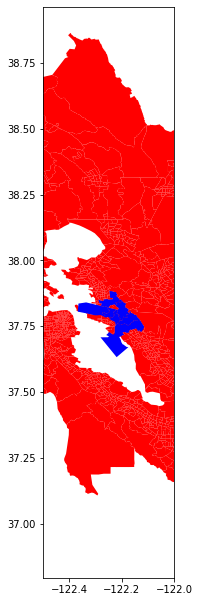

In [26]:
# graph polygons in oakland_city_council_2014.csv and tracts in oakland_tracts_2010.csv
# open oakland_city_council_2014.csv and oakland_tracts_2010.csv
districts = pd.read_csv(r'D:\Users\User\Downloads\RA Work\acs\geodata\oakland_city_council_2003.csv')
tracts = pd.read_csv(r'D:\Users\User\Downloads\RA Work\acs\tracts\oakland_tracts_2010.csv')

districts['geometry'] = districts['geometry'].apply(wkt.loads)
tracts['geometry'] = tracts['geometry'].apply(wkt.loads)
districts = gpd.GeoDataFrame(districts, geometry='geometry')
tracts = gpd.GeoDataFrame(tracts, geometry='geometry')

# plot on same graph different colors
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
tracts.plot(ax=ax, color='red')
districts.plot(ax=ax, color='blue')

# zoom in on districts
ax.set_xlim(-122.5, -122)

#enlarge picture
fig.set_size_inches(18.5, 10.5)
plt.show()

In [27]:
# get tracts that overlap with each district
tracts_in_districts = gpd.sjoin(tracts, districts, how='inner', op='intersects')

print(tracts_in_districts)

                                               geometry  TRACTCE  index_right  \
9     MULTIPOLYGON (((-122.27127 37.80436, -122.2667...   402900            3   
16    MULTIPOLYGON (((-122.28402 37.81562, -122.2802...   402400            3   
35    MULTIPOLYGON (((-122.16921 37.74276, -122.1656...   410400            0   
44    MULTIPOLYGON (((-122.33672 37.80034, -122.3321...   428700            3   
48    MULTIPOLYGON (((-122.19283 37.76200, -122.1902...   408600            5   
...                                                 ...      ...          ...   
1547  MULTIPOLYGON (((-122.25447 37.80184, -122.2540...   405301            1   
1547  MULTIPOLYGON (((-122.25447 37.80184, -122.2540...   405301            3   
1568  MULTIPOLYGON (((-122.26181 37.84179, -122.2613...   400400            4   
1572  MULTIPOLYGON (((-122.28221 37.79627, -122.2796...   983200            1   
1572  MULTIPOLYGON (((-122.28221 37.79627, -122.2796...   983200            3   

      district  
9     DIST

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [59]:
# remove rows where percent < 0.5
blocks_districts = blocks_districts[blocks_districts['percent'] >= 0.5]

In [60]:
# create a df with the district and a list of TRACTCE20s that are in the district
districts_tracts = blocks_districts.groupby('district')['CE2020'].apply(list).reset_index()

districts_tracts.head()

,district,CE2020
0,1,"[4205, 4204.02, 4219, 4220, 4221, 4213, 4222, ..."
1,2,"[4240.02, 4221, 4222, 4220, 4232, 4233, 4251.0..."
2,3,"[4233, 4240.02, 4007, 4234, 4236.02, 4235, 400..."
3,4,"[4223, 4217, 4224, 4235, 4234, 4236.02, 4229.0..."
4,5,"[4206, 4201, 4211, 4214, 4213, 4217, 4218, 421..."


In [61]:
# add column percent to districts
districts_tracts['percent'] = 0

# for each row in districts df
for i, row in districts.iterrows():
    # get the district
    district = row['district']

    # get the district's multipolygon
    district_multipolygon = row['geometry']

    # get the blocks in blocks_districts that are in the district and have a percent column of >0.5
    blocks_in_district = blocks_districts[(blocks_districts['district'] == district) & (blocks_districts['percent'] >= 0.5)]

    # calculate the percent of the district that is composed of these blocks
    percent = blocks_in_district['geometry'].area.sum() / district_multipolygon.area

    # set percent column in districts_tracts where District is district to percent
    districts_tracts.loc[districts_tracts['district'] == district, 'percent'] = percent

C:\Users\User\AppData\Local\Temp\ipykernel_28588\1684967709.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9998410170904036' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  districts_tracts.loc[districts_tracts['district'] == district, 'percent'] = percent


,geometry,district
0,"MULTIPOLYGON (((-122.26498 37.90404, -122.2649...",6
1,"MULTIPOLYGON (((-122.31849 37.86804, -122.3183...",2
2,"MULTIPOLYGON (((-122.28292 37.88156, -122.2828...",5
3,"MULTIPOLYGON (((-122.29623 37.88341, -122.2962...",1
4,"MULTIPOLYGON (((-122.25871 37.86326, -122.2588...",3


In [62]:
# rename CE2020 to tracts
districts_tracts.rename(columns={'CE2020': 'tracts'}, inplace=True)

In [64]:
blocks_districts.to_csv('berkeley_blocks_districts_2020.csv', index=False)
districts_tracts.to_csv('berkeley_districts_tracts_2020.csv', index=False)